# Model Assessment
You should build a machine learning pipeline with a complete model assessment step. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 
- Choose a few machine learning algorithms, such as [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), and [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
- Define a grid of hyperparameters for every selected model.
- Conduct [grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) using k-fold cross-validation on the training set to find out the best model (i.e., the best algorithm and its hyperparameters).
- Train the best model on the whole training set.
- Test the trained model on the test set and report various [evaluation metrics](https://scikit-learn.org/0.15/modules/model_evaluation.html).  
- Check the documentation to identify the most important hyperparameters, attributes, and methods. Use them in practice.

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection #Split train and test set and conduct the grid search
import sklearn.neighbors #KNN algorithm
import sklearn.svm #SVM algorithm
import sklearn.tree #Decision tree algorithm
import sklearn.metrics #Accuracy score

### Load dataset

In [2]:
mnist_db = pd.read_csv('/Users/adolfomytr/Documents/Alemania/Master/GISMA/Materias/teaching-main/datasets/mnist.csv')
mnist_db = mnist_db.set_index('id')
mnist_db.head()

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
id,,,,,,,,,,,,,,,,,,,,,
31953,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34452,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60897,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split into training and testing set

In [3]:
df_train, df_test = sklearn.model_selection.train_test_split(mnist_db)
print('df_train', df_train.shape)
print('df_test', df_test.shape)

df_train (3000, 785)
df_test (1000, 785)


### Define a grid for 3 ML models (KNN, Decision Tree, SVM)

In [4]:
knn_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7], 'p':[1, 2]}
svm_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'kernel':['linear', 'poly', 'rbf']}
dt_grid = {'criterion':['gini', 'entropy', 'log_loss'], 'max_depth': [3, 4, 5, 6, 7, 8, 9]}

### Conduct the grid search to find the best model

In [5]:
#Create 3 GridSearchCV objects for each of the models
grid_search_knn = sklearn.model_selection.GridSearchCV(sklearn.neighbors.KNeighborsClassifier(), knn_grid, cv=5, error_score='raise')
grid_search_svm = sklearn.model_selection.GridSearchCV(sklearn.svm.SVC(), svm_grid, cv=5, error_score='raise')
grid_search_dt = sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeClassifier(), dt_grid, cv=5, error_score='raise')

#Split into x_train, x_test, y_train, y_test
x_train = df_train.drop('class', axis=1)
y_train = df_train['class']
x_test = df_test.drop('class', axis=1)
y_test = df_test['class']

#Fit the training set to each grid search
grid_search_knn.fit(x_train, y_train)
grid_search_svm.fit(x_train, y_train)
grid_search_dt.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9]})

### Evaluate best metrics

In [6]:
print('best_score KNN', grid_search_knn.best_score_)
print('best_params KNN', grid_search_knn.best_params_)
print('best_estimator KNN', grid_search_knn.best_estimator_)
print('')
print('best_score SVM', grid_search_svm.best_score_)
print('best_params SVM', grid_search_svm.best_params_)
print('best_estimator SVM', grid_search_svm.best_estimator_)
print('')
print('best_score DT', grid_search_dt.best_score_)
print('best_params DT', grid_search_dt.best_params_)
print('best_estimator DT', grid_search_dt.best_estimator_)

best_score KNN 0.9226666666666666
best_params KNN {'n_neighbors': 3, 'p': 2}
best_estimator KNN KNeighborsClassifier(n_neighbors=3)

best_score SVM 0.953
best_params SVM {'C': 10, 'kernel': 'rbf'}
best_estimator SVM SVC(C=10)

best_score DT 0.7586666666666667
best_params DT {'criterion': 'log_loss', 'max_depth': 8}
best_estimator DT DecisionTreeClassifier(criterion='log_loss', max_depth=8)


### We choose the best model, and we test it

In this case, it was the SVM model the one who showed the highest score

In [7]:
y_predicted = grid_search_svm.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
print('Accuracy', accuracy)

Accuracy 0.949


### We try other than accuracy evaluation metrics

Confusion matrix

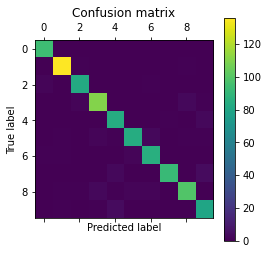

,0,1,2,3,4,5,6,7,8,9
0,94,0,0,0,0,0,0,0,0,0
1,0,136,1,0,0,0,0,0,1,0
2,2,0,83,0,0,0,1,0,0,0
3,0,0,2,111,0,0,0,0,3,1
4,0,0,0,0,84,0,0,1,0,3
5,0,1,0,2,1,84,3,0,1,1
6,1,1,0,0,0,2,86,0,0,0
7,0,0,0,0,3,0,0,92,0,4
8,0,1,1,3,1,2,2,0,99,0
9,0,1,0,1,4,0,0,0,0,80


In [8]:
cm = sklearn.metrics.confusion_matrix(y_test, y_predicted)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

pd.DataFrame(sklearn.metrics.confusion_matrix(y_test, y_predicted))